In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# [statsmodels](https://www.statsmodels.org/stable/index.html),  [datasets](https://www.statsmodels.org/stable/datasets/index.html#datasets) 

# Create a stationary time series

In [13]:
import statsmodels.tsa.arima_process as arima_process

In [14]:
process = arima_process.ArmaProcess(ar=[1, -0.8], ma=[1])

## Take a sample

In [15]:
z = process.generate_sample(nsample=100)

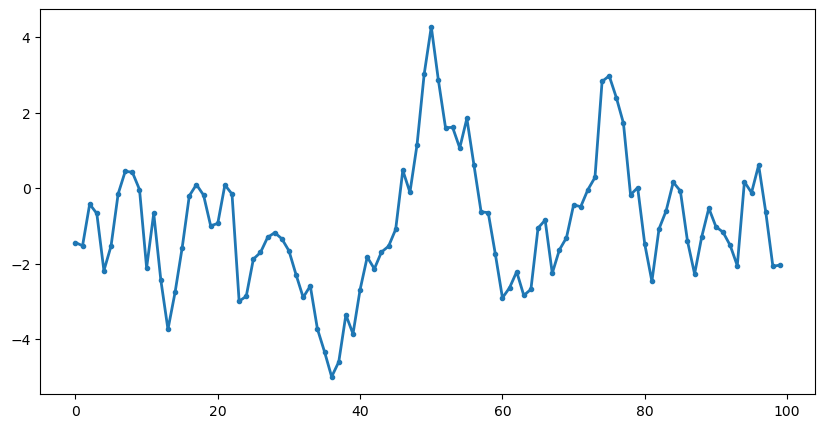

In [16]:
plt.figure(figsize=(10,5))
plt.plot(z,linewidth=2,marker='.')

# Plotting autocorrelations

In [17]:
acf = process.acf(lags=20)

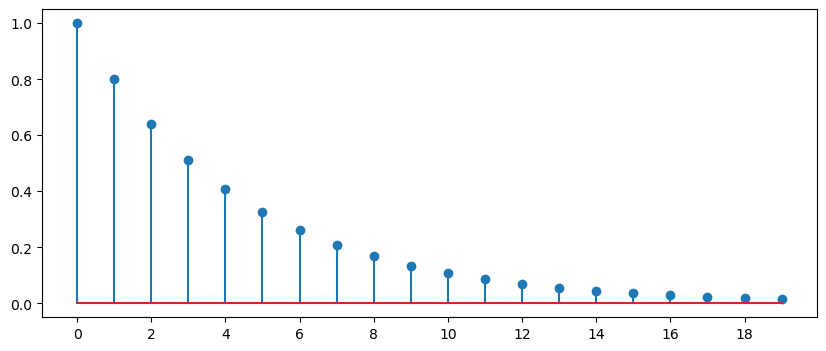

In [18]:
plt.figure(figsize=(10,4))
plt.stem(acf)
plt.xticks(ticks=range(0,20,2))
plt.show()

# Plotting sample autocorrelations

In [19]:
import statsmodels.graphics.tsaplots as tsaplots

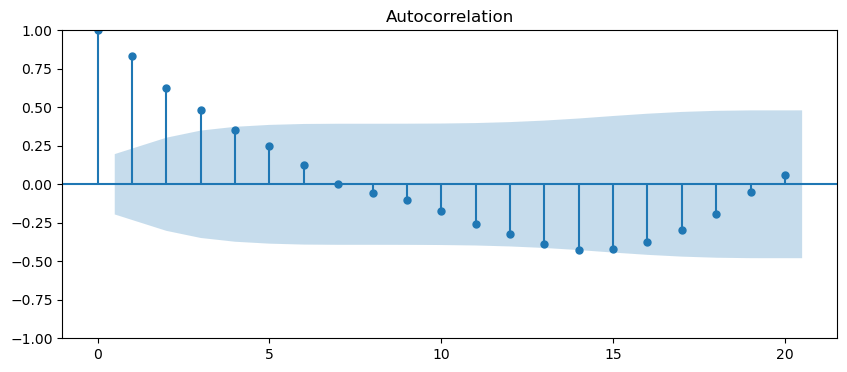

In [20]:
_, ax = plt.subplots(figsize=(10,4))
tsaplots.plot_acf(z,lags=20, ax=ax)
plt.show()

# Load sunspots data

In [21]:
sunspots = pd.read_csv('data/Sunspots.csv')
sunspots.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [22]:
sunspots.loc[0,'Date']

'1749-01-31'

In [23]:
pd.to_datetime(sunspots.loc[0,'Date'])

Timestamp('1749-01-31 00:00:00')

In [24]:
sunspots = sunspots.set_index(pd.to_datetime(sunspots['Date']))
sunspots.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
Date,,,
1749-01-31,0,1749-01-31,96.7
1749-02-28,1,1749-02-28,104.3
1749-03-31,2,1749-03-31,116.7
1749-04-30,3,1749-04-30,92.8
1749-05-31,4,1749-05-31,141.7


In [25]:
sunspots.drop(columns=['Unnamed: 0','Date'], inplace=True)

In [26]:
sunspots.rename(columns={'Monthly Mean Total Sunspot Number':'values'}, inplace=True)

<Axes: xlabel='Date'>

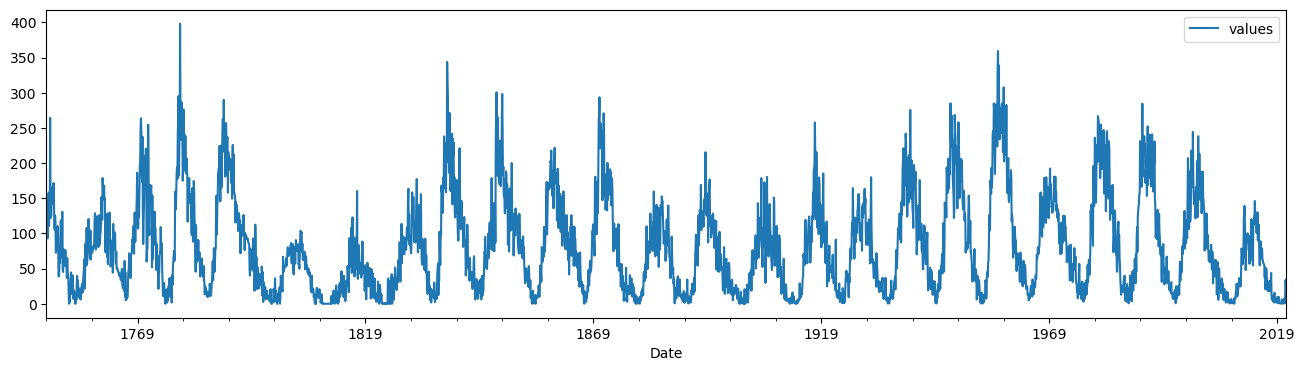

In [27]:
sunspots.plot(figsize=(16,4))

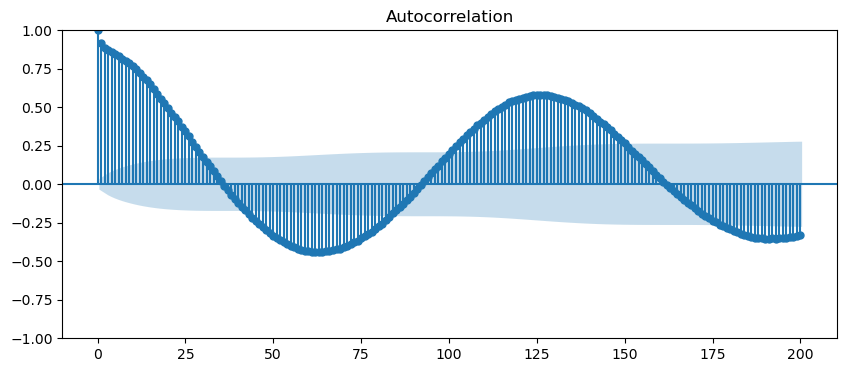

In [28]:
fig, ax = plt.subplots(figsize=(10,4))
tsaplots.plot_acf(sunspots,lags=200, ax=ax)
plt.show()

# Take a difference

In [29]:
diff_sunspots = sunspots.diff().dropna()

<Axes: xlabel='Date'>

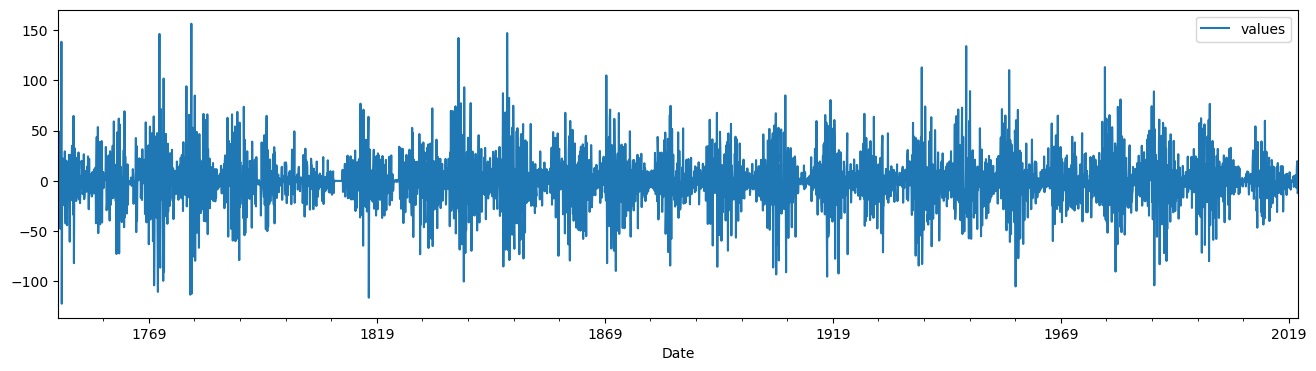

In [30]:
diff_sunspots.plot(figsize=(16,4))

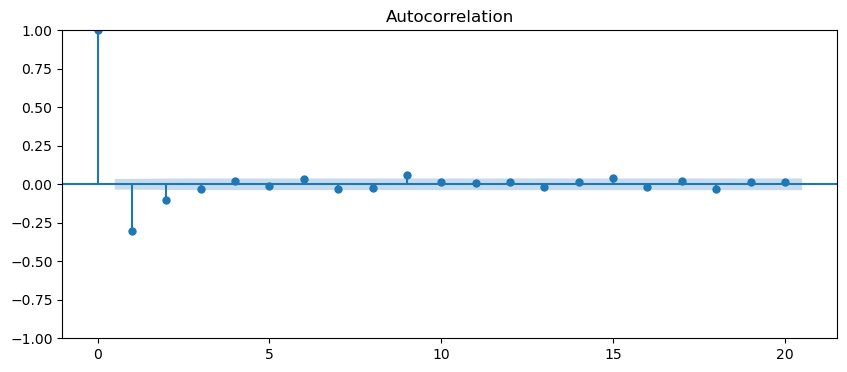

In [31]:
_, ax = plt.subplots(figsize=(10,4))
tsaplots.plot_acf(diff_sunspots,lags=20, ax=ax)
plt.show()